# Examen Practico Primer Interciclo
<div style="text-align: right"> _Por: S. Peñaranda J._ </div>

### Parte uno, modelos matematico y probabilisticos


In [1]:
import pandas as pd
import numpy as np
import time
import datetime
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression 
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Fuente de datos
#https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv
url = ('Recovered_EC.csv')
df = pd.read_csv(url, sep=';')
df

,date,recovered,total_recovered
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0
...,...,...,...
75,75,103,3536
76,76,0,3536
77,77,0,3536
78,78,0,3536


In [3]:
df = df.loc[:,['date','total_recovered']]
df= df[df["date"] > 0.0]
df

,date,total_recovered
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
...,...,...
75,75,3536
76,76,3536
77,77,3536
78,78,3536


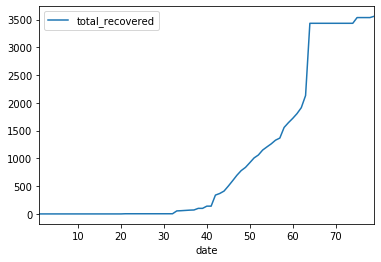

In [4]:
df.plot(x ='date', y='total_recovered')

In [5]:
x = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1]) # Numero de casos
print(x,y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 54, 58, 63, 68, 71, 100, 100, 140, 140, 339, 368, 411, 501, 597, 696, 780, 838, 922, 1008, 1061, 1150, 1207, 1262, 1328, 1366, 1557, 1643, 1720, 1806, 1913, 2132, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3536, 3536, 3536, 3536, 3560]


## Prediccion a 7 dias

### Modelo Exponencial

In [6]:
# Implementar
def modelo_exponencial(x, a, b,c):
    #return (a*np.exp(b*x-50)
    return a * np.exp(b*(x - c))

popt, pcov = curve_fit(modelo_exponencial, x, y, maxfev=2000)
print(popt)

[ 32.17753121   0.05313313 -14.51830002]


[ 32.17753121   0.05313313 -14.51830002]
Modelo de prediccion EXPONENCIAL
Total infectados del dia 86: 6715.0


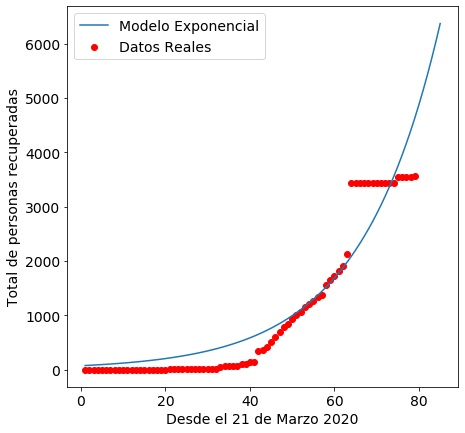

In [7]:
# Implementar
def modelo_exponencial(x, a, b,c):
    #return (a*np.exp(b*x-50)
    return a * np.exp(b*(x - c))

popt, pcov = curve_fit(modelo_exponencial, x, y, maxfev=2000)
print(popt)
pred_x = np.array(range(1,86)) # Predecir 
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)

plt.scatter(x,y,label="Datos Reales",color="red")
plt.plot(pred_x, [modelo_exponencial(i,popt[0],popt[1],popt[2]) for i in pred_x], label="Modelo Exponencial" )
print("Modelo de prediccion EXPONENCIAL")
print("Total infectados del dia 86:",round(modelo_exponencial(86,popt[0],popt[1],popt[2])))
plt.legend()
plt.xlabel("Desde el 21 de Marzo 2020")
plt.ylabel("Total de personas recuperadas")
plt.show()
print()

### Modelo Polinomial

Preddicion POLINOMIAL con un grado de: 8
Total de recuperados en el dia 86: 7122.0


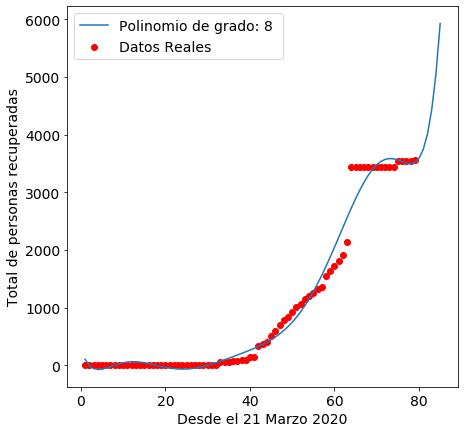

In [8]:
# Implementar
modelo_polinomial = {}
prediccion = 0

for grado in range(8,9):
    resultados_modelo = np.polyfit(x, y, grado, full=True)
    modelo_polinomial[grado] = resultados_modelo

plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
plt.scatter(x,y,label="Datos Reales",color="red")

prediccion_x = np.array(range(1,86))
for grado, modelo in modelo_polinomial.items():
    coeficientes, error, *_ = modelo
    prediccion = np.poly1d(coeficientes)
    print("Preddicion POLINOMIAL con un grado de:",grado)
    print("Total de recuperados en el dia 86:",round(prediccion(86)))
    plt.plot(prediccion_x, prediccion(prediccion_x), "-", label="Polinomio de grado: %s " % (grado) )
plt.legend()
plt.xlabel("Desde el 21 Marzo 2020")
plt.ylabel("Total de personas recuperadas")
plt.show()

### Modelo Probabilistico

In [9]:
#Fuente de datos
#https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv
url = ('Recovered_EC.csv')
df_t = pd.read_csv(url, sep=';')
df_t = df_t.loc[:,['date','recovered']]
df_t= df_t[df_t["recovered"] > 0.0]
df_t

,date,recovered
21,21,3
33,33,51
34,34,4
35,35,5
36,36,5
37,37,3
38,38,29
40,40,40
42,42,199
43,43,29


Text(0.5, 1.0, 'Datos reales nuevos recuperados')

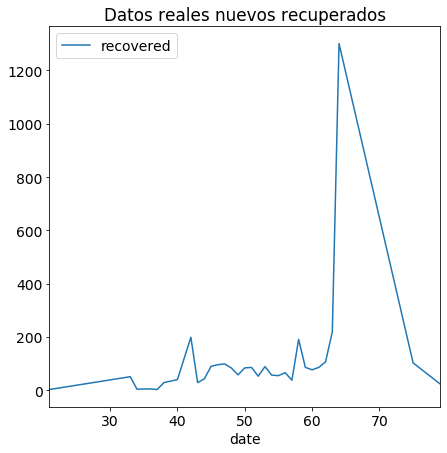

In [10]:
df_t.plot(x ='date', y='recovered')
plt.title("Datos reales nuevos recuperados")

In [11]:
filtro = df_t["recovered"] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
print('Mediana', mediana)
print('Media', media)

Mediana 66.0
Media 107.87878787878788


In [12]:
#Vamos a comprobar:
# según la media y la mediana podemos obtener la taza de crecieminto y predicir su comportamiento.
# Cargamos los datos de total de casos
y = list(df.iloc [:, 1]) # Total casos
x = list(df.iloc [:, 0]) # Dias
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)
print(prediccion_siguiente)

3626


En 7 dias el numero de casos es 4022


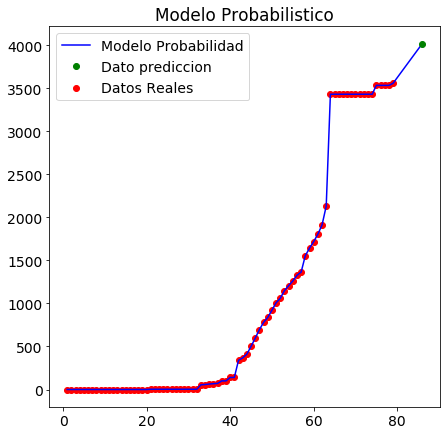

In [13]:
# Quiero predecir cuántos "Casos" voy a obtener de aqui a 7 dias.
plt.scatter(x, y,label="Datos Reales", color='red')
plt.plot()
for i in range(x[-1]+1, x[-1]+8):
    x.append(i)
    y.append(int(y[-1] + mediana))
plt.plot(x,y,label="Modelo Probabilidad", color="blue")
print('En 7 dias el numero de casos es', y[-1])
plt.plot(x[-1],y[-1],'go', label='Dato prediccion')
plt.legend()
plt.title("Modelo Probabilistico")
plt.show()

## Prediccion a 30 dias
### Modelo Exponencial

In [14]:
# Implementar
def modelo_exponencial(x, a, b,c):
    #return (a*np.exp(b*x-50)
    return a * np.exp(b*(x - c))

popt, pcov = curve_fit(modelo_exponencial, x, y, maxfev=2000)
print(popt)

[ 41.65512822   0.04254495 -26.54818108]


[ 41.65512822   0.04254495 -26.54818108]
Modelo de prediccion EXPONENCIAL
Total infectados del dia 109: 13311.0


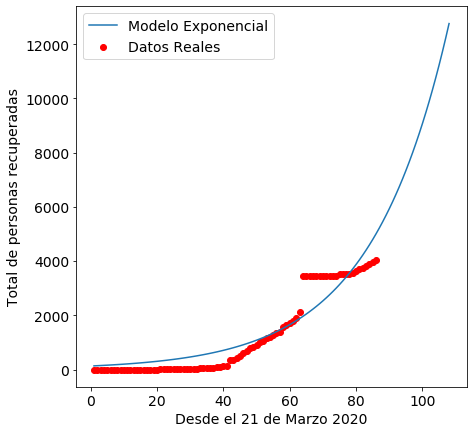

In [15]:
# Implementar
def modelo_exponencial(x, a, b,c):
    return a * np.exp(b*(x - c))

popt, pcov = curve_fit(modelo_exponencial, x, y, maxfev=2000)
print(popt)
pred_x = np.array(range(1,109)) # Predecir 
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)

plt.scatter(x,y,label="Datos Reales",color="red")
plt.plot(pred_x, [modelo_exponencial(i,popt[0],popt[1],popt[2]) for i in pred_x], label="Modelo Exponencial" )
print("Modelo de prediccion EXPONENCIAL")
print("Total infectados del dia 109:",round(modelo_exponencial(109,popt[0],popt[1],popt[2])))
plt.legend()
plt.xlabel("Desde el 21 de Marzo 2020")
plt.ylabel("Total de personas recuperadas")
plt.show()
print()

## Modelo Polinomial

Preddicion POLINOMIAL con un grado de: 3
Total de recuperados en el dia 109: 5701.0


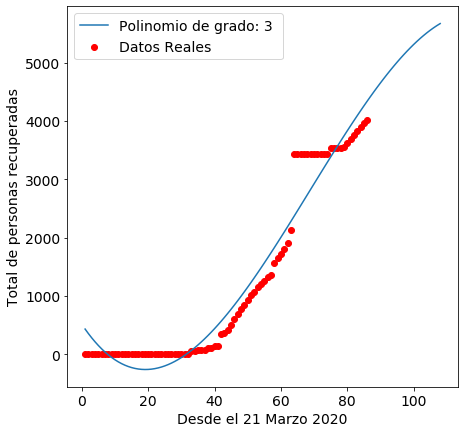

In [16]:
# Implementar
modelo_polinomial = {}
prediccion = 0

for grado in range(3,4):
    resultados_modelo = np.polyfit(x, y, grado, full=True)
    modelo_polinomial[grado] = resultados_modelo

plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
plt.scatter(x,y,label="Datos Reales",color="red")

prediccion_x = np.array(range(1,109))
for grado, modelo in modelo_polinomial.items():
    coeficientes, error, *_ = modelo
    prediccion = np.poly1d(coeficientes)
    print("Preddicion POLINOMIAL con un grado de:",grado)
    print("Total de recuperados en el dia 109:",round(prediccion(109)))
    plt.plot(prediccion_x, prediccion(prediccion_x), "-", label="Polinomio de grado: %s " % (grado) )
plt.legend()
plt.xlabel("Desde el 21 Marzo 2020")
plt.ylabel("Total de personas recuperadas")
plt.show()

### Modelo Probabilistico

Text(0.5, 1.0, 'Datos reales nuevos recuperados')

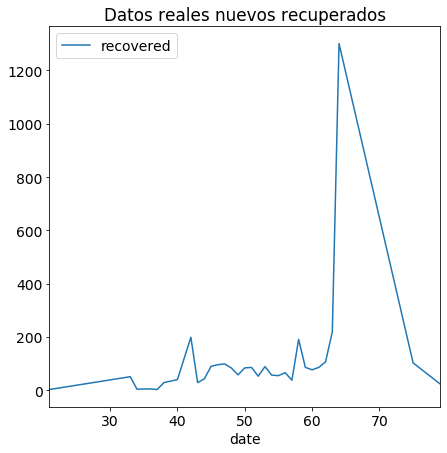

In [17]:
#Fuente de datos
#https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv
url = ('Recovered_EC.csv')
df_t = pd.read_csv(url, sep=';')
df_t = df_t.loc[:,['date','recovered']]
df_t= df_t[df_t["recovered"] > 0.0]
df_t.plot(x ='date', y='recovered')
plt.title("Datos reales nuevos recuperados")

In [18]:
filtro = df_t["recovered"] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
print('Mediana', mediana)
print('Media', media)

Mediana 66.0
Media 107.87878787878788


In [19]:
y = list(df.iloc [:, 1]) # Total casos
x = list(df.iloc [:, 0]) # Dias
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)
print(prediccion_siguiente)

3626


En 30 dias el numero de casos es 5540


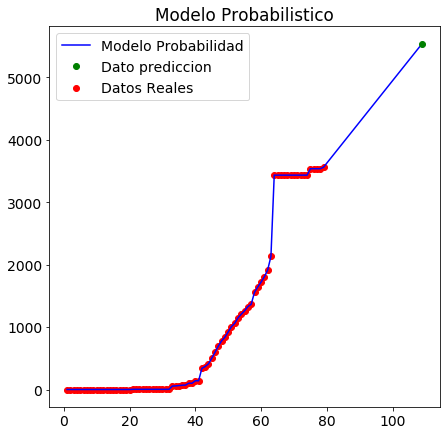

In [20]:
# Quiero predecir cuántos "Casos" voy a obtener de aqui a 30 dias.
plt.scatter(x, y,label="Datos Reales", color='red')
plt.plot()
for i in range(x[-1]+1, x[-1]+31):
    x.append(i)
    y.append(int(y[-1] + mediana))
plt.plot(x,y,label="Modelo Probabilidad", color="blue")
print('En 30 dias el numero de casos es', y[-1])
plt.plot(x[-1],y[-1],'go', label='Dato prediccion')
plt.legend()
plt.title("Modelo Probabilistico")
plt.show()

# Observaciones

- Cual tiene una mejor prediccion.

A mi parecer el que tiene mejor prediccion es el modelo Probabilistico ya que ese se ajusta de mejor manera a los datos reales y es un número mas considerable que el que nos da el Modelo Exponencial y el Modelo Polinomial, claro que el modelo polinomial tambien se pudiese acoplar pero va a depender mucho del grado del mismo, ya que en mi caso al probar con polinomio de grado 4 o 5, en la prediccion a una semana o un mes me salia un dato negativo, por ello creo que el MODELO PROBABILÍSTICO es el mejor.

- Ventajas y desventajas de los modelos.

**Ventajas**

Las funciones exponenciales es que éstas pueden ser utilizadas para realizar aproximaciones a valores muy altos, o para modelar aquellos fenómenos que presentan un crecimiento que a medida que se hace mas grande se incrementa a mayor razón. 

No requiere de gran volumen de datos históricos.

Al ser un modelo polinomial, es más preciso, ya que dependiendo del grado se adaptara a la realidad que se desee estudiar.

Funciona con cualquier tamaño de muestra.

Trabaja bien sobre datos no lineales.

**Desventajas**

Las funciones exponenciales nos permiten estudiar y modelar funciones que tienen un alto indice de crecimiento, sin embargo, son un poco complicadas de tratar. 

No producen una función de regresión fácilmente representable por una fórmula matemática.

Se requiere elegir el grado correcto del polinomio para una buena predicción.

- Comparacion entre los modelos aplicados.


# Parte 2, simulacion de eventos discretos

# Simulacion de procesos para la reinsercion laboral 

In [87]:
import simpy
import random
import matplotlib.pyplot as pp
import numpy as np

%matplotlib inline

#PARAMETROS
RECUPERADOS_ACTUALES = 5540
##El valor de la tasa de crecimiento es la media de los nuevos recuperados
TASA_CRECIMIENTO = 107
DIAS_INTERNADO = 10 #Tiempo en dias
#Proyeccion a un año
DIAS_SIMULACION = 296 #Tiempo en dias

#Dato obtenido de https://www.primicias.ec/noticias/sociedad/laboratorios-autorizados-pruebas-covid-ecuador/
LABORATORIOS = 26

#Diccionario para almacenar los resultados
persona_recuperadas = {}
persona_desempleada = {}
persona_reinsercion = {}

alimentacion = {}
retail = {}
restaurante = {}
viajes = {}
hoteles = {}

reinsercion_alimentacion = {}
reinsercion_retail = {}
reinsercion_restaurante = {}
reinsercion_viajes = {}
reinsercion_hoteles = {}



class Reinsercion(object):
    #constructor
    def __init__(self, env, laboratorios):
            self.env = env
            self.laboratorios = laboratorios  
            self.laboratorios = simpy.Resource(env, laboratorios)
            
    def descansar(self, persona):
        yield self.env.timeout(random.randint(2, 7))
    
    def teletrabajo(self, persona):
        yield self.env.timeout(random.randint(5, 14))
        
    def asignar_lab(self, persona):
        yield self.env.timeout(random.randint(1,8))
        
    def valoracion(self, persona):
        yield self.env.timeout(random.randint(3,7))
        
    def trabajo_presencial(self,persona):
        yield self.env.timeout(random.randint(1, 56))
            

def llegada_empleado(env, reinsercion, empleo):
    llegada = env.now
    tiene_empleo = random.randint(1,100)
    tipo_trabajo = random.randint(1,5)
    ##EMPLEO
    if(tiene_empleo < 71):
        ##EMPLEO ALIMENTACION
        if(tipo_trabajo == 1):
            alimentacion[env.now] = alimentacion[env.now] + 1 if env.now in alimentacion else  1
            reinsercion.descansar(empleo)
            reinsercion.teletrabajo(empleo)
            observacion = True
            while observacion:
                with reinsercion.laboratorios.request() as laboratorio:
                    tiempo_espera_lab=random.randint(1,8)
                    requerimiento_lab = yield laboratorio | env.timeout(tiempo_espera_lab)
                    esperando = env.now - llegada
                    if laboratorio in requerimiento_lab:
                        yield env.process(reinsercion.asignar_lab(empleo))
                        valorar = random.randint(1,100)
                        if(valorar < 71):
                            reinsercion.trabajo_presencial(empleo)
                            observacion = False
                            reinsercion_alimentacion[env.now] = reinsercion_alimentacion[env.now] + 1 if env.now in reinsercion_alimentacion else  1
                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else  1
                        else:
                            reinsercion.valoracion(empleo)
                            valorar=True
        #FIN EMPLEO ALIMENTACION#
    
        ##EMPLEO RETAIL
        elif(tipo_trabajo == 2):
            retail[env.now] = retail[env.now] + 1 if env.now in retail else  1
            reinsercion.descansar(empleo)
            reinsercion.teletrabajo(empleo)
            observacion = True
            while observacion:
                with reinsercion.laboratorios.request() as laboratorio:
                    tiempo_espera_lab=random.randint(1,8)
                    requerimiento_lab = yield laboratorio | env.timeout(tiempo_espera_lab)
                    esperando = env.now - llegada
                    if laboratorio in requerimiento_lab:
                        yield env.process(reinsercion.asignar_lab(empleo))
                        valorar = random.randint(1,100)
                        if(valorar < 71):
                            reinsercion.trabajo_presencial(empleo)
                            observacion = False
                            reinsercion_retail[env.now] = reinsercion_retail[env.now] + 1 if env.now in reinsercion_retail else  1
                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else  1
                        else:
                            reinsercion.valoracion(empleo)
                            valorar=True
        #FIN EMPLEO RETAIL#
    
        ##EMPLEO RESTAURANTE
        elif(tipo_trabajo == 3):
            restaurante[env.now] = restaurante[env.now] + 1 if env.now in restaurante else  1
            reinsercion.descansar(empleo)
            reinsercion.teletrabajo(empleo)
            observacion = True
            while observacion:
                with reinsercion.laboratorios.request() as laboratorio:
                    tiempo_espera_lab=random.randint(1,8)
                    requerimiento_lab = yield laboratorio | env.timeout(tiempo_espera_lab)
                    esperando = env.now - llegada
                    if laboratorio in requerimiento_lab:
                        yield env.process(reinsercion.asignar_lab(empleo))
                        valorar = random.randint(1,100)
                        if(valorar < 71):
                            reinsercion.trabajo_presencial(empleo)
                            observacion = False
                            reinsercion_restaurante[env.now] = reinsercion_restaurante[env.now] + 1 if env.now in reinsercion_restaurante else  1
                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else  1
                        else:
                            reinsercion.valoracion(empleo)
                            valorar=True
        #FIN EMPLEO RESTAURANTE#
    
        ##EMPLEO VIAJES
        elif(tipo_trabajo == 4):
            viajes[env.now] = viajes[env.now] + 1 if env.now in viajes else  1
            reinsercion.descansar(empleo)
            reinsercion.teletrabajo(empleo)
            observacion = True
            while observacion:
                with reinsercion.laboratorios.request() as laboratorio:
                    tiempo_espera_lab=random.randint(1,8)
                    requerimiento_lab = yield laboratorio | env.timeout(tiempo_espera_lab)
                    esperando = env.now - llegada
                    if laboratorio in requerimiento_lab:
                        yield env.process(reinsercion.asignar_lab(empleo))
                        valorar = random.randint(1,100)
                        if(valorar < 71):
                            reinsercion.trabajo_presencial(empleo)
                            observacion = False
                            reinsercion_viajes[env.now] = reinsercion_viajes[env.now] + 1 if env.now in reinsercion_viajes else  1
                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else  1
                        else:
                            reinsercion.valoracion(empleo)
                            valorar=True
        #FIN EMPLEO VIAJES#
    
        ##EMPLEO HOTELES
        else:
            hoteles[env.now] = hoteles[env.now] + 1 if env.now in hoteles else  1
            reinsercion.descansar(empleo)
            reinsercion.teletrabajo(empleo)
            observacion = True
            while observacion:
                with reinsercion.laboratorios.request() as laboratorio:
                    tiempo_espera_lab=random.randint(1,8)
                    requerimiento_lab = yield laboratorio | env.timeout(tiempo_espera_lab)
                    esperando = env.now - llegada
                    if laboratorio in requerimiento_lab:
                        yield env.process(reinsercion.asignar_lab(empleo))
                        valorar = random.randint(1,100)
                        if(valorar < 71):
                            reinsercion.trabajo_presencial(empleo)
                            observacion = False
                            reinsercion_hoteles[env.now] = reinsercion_hoteles[env.now] + 1 if env.now in reinsercion_hoteles else  1
                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else  1
                        else:
                            reinsercion.valoracion(empleo)
                            valorar=True
        ##FIN EMPLEO HOTELES
    ##FIN EMPLEo
    else:
        persona_desempleada[env.now] = persona_desempleada[env.now] + 1 if env.now in persona_desempleada else  1

def ejecutar(env, tasa_crecimiento, recuperados):
    reinsercion = Reinsercion(env, LABORATORIOS)
    for i in range(recuperados):
        asignar_empleo(env, reinsercion, i)
    empleo = recuperados
    while True:
        yield env.timeout(1)
        for i in range(tasa_crecimiento):
            empleo += 1
            asignar_empleo(env, reinsercion, empleo)
                
def asignar_empleo(env, reinsercion, empleo):
    reinsercionE = 1
    if (reinsercionE == 1):
        
        env.process(llegada_empleado(env, reinsercion, empleo))
        
print("Simulacion reincorporacion luego del COVID-19")
env=simpy.Environment()
env.process(ejecutar(env,TASA_CRECIMIENTO, RECUPERADOS_ACTUALES))
env.run(until=DIAS_SIMULACION)

Simulacion reincorporacion luego del COVID-19


### Separamos los dias para tener meses

In [88]:
#ALIMENTACION
print("ALIMENTACION")
junioA = reinsercion_alimentacion.values()
print(sum(list(junioA)[:30]))
junioA = (sum(list(junioA)[:30]))

julioA = reinsercion_alimentacion.values()
julioA = (sum(list(julioA)[30:60]))
print(julioA)

agostoA = reinsercion_alimentacion.values()
agostoA = (sum(list(agostoA)[60:90]))
print(agostoA)

septiembreA = reinsercion_alimentacion.values()
septiembreA = (sum(list(septiembreA)[90:120]))
print(septiembreA)

octubreA = reinsercion_alimentacion.values()
octubreA = (sum(list(octubreA)[120:150]))
print(octubreA)

noviembreA = reinsercion_alimentacion.values()
noviembreA = (sum(list(noviembreA)[150:180]))
print(noviembreA)

diciembreA = reinsercion_alimentacion.values()
diciembreA = (sum(list(diciembreA)[180:]))
print(diciembreA)

#RETAIL
print("RETAIL")
junioR = reinsercion_retail.values()
junioR = (sum(list(junioR)[:30]))
print(junioR)

julioR = reinsercion_retail.values()
julioR = (sum(list(julioR)[30:60]))
print(julioR)

agostoR = reinsercion_retail.values()
agostoR = (sum(list(agostoR)[60:90]))
print(agostoR)

septiembreR = reinsercion_retail.values()
septiembreR = (sum(list(septiembreR)[90:120]))
print(septiembreR)

octubreR = reinsercion_retail.values()
octubreR = (sum(list(octubreR)[120:150]))
print(octubreR)

noviembreR = reinsercion_retail.values()
noviembreR = (sum(list(noviembreR)[150:180]))
print(noviembreR)

diciembreR = reinsercion_retail.values()
diciembreR = (sum(list(diciembreR)[180:]))
print(diciembreR)

#RESTAURANTE
print("RESTAURANTE")
junioRE = reinsercion_restaurante.values()
junioRE = (sum(list(junioRE)[:30]))
print(junioRE)

julioRE = reinsercion_restaurante.values()
julioRE = (sum(list(julioRE)[30:60]))
print(julioRE)

agostoRE = reinsercion_restaurante.values()
agostoRE = (sum(list(agostoRE)[60:90]))
print(agostoRE)

septiembreRE = reinsercion_restaurante.values()
septiembreRE = (sum(list(septiembreRE)[90:120]))
print(septiembreRE)

octubreRE = reinsercion_restaurante.values()
octubreRE = (sum(list(octubreRE)[120:150]))
print(octubreRE)

noviembreRE = reinsercion_restaurante.values()
noviembreRE = (sum(list(noviembreRE)[150:180]))
print(noviembreRE)

diciembreRE = reinsercion_restaurante.values()
diciembreRE = (sum(list(diciembreRE)[180:]))
print(diciembreRE)

#VIAJES
print("VIAJES")
junioV = reinsercion_viajes.values()
junioV = (sum(list(junioV)[:30]))
print(junioV)

julioV = reinsercion_viajes.values()
julioV = (sum(list(julioV)[30:60]))
print(julioV)

agostoV = reinsercion_viajes.values()
agostoV = (sum(list(agostoV)[60:90]))
print(agostoV)

septiembreV = reinsercion_viajes.values()
septiembreV = (sum(list(septiembreV)[90:120]))
print(septiembreV)

octubreV = reinsercion_viajes.values()
octubreV = (sum(list(octubreV)[120:150]))
print(octubreV)

noviembreV = reinsercion_viajes.values()
noviembreV = (sum(list(noviembreV)[150:180]))
print(noviembreV)

diciembreV = reinsercion_viajes.values()
diciembreV = (sum(list(diciembreV)[180:]))
print(diciembreV)

#HOTELES
print("HOTELES")
junioH = reinsercion_hoteles.values()
junioH = (sum(list(junioH)[:30]))
print(junioH)

julioH = reinsercion_hoteles.values()
julioH = (sum(list(julioH)[30:60]))
print(julioH)

agostoH = reinsercion_hoteles.values()
agostoH = (sum(list(agostoH)[60:90]))
print(agostoH)

septiembreH = reinsercion_hoteles.values()
septiembreH = (sum(list(septiembreH)[90:120]))
print(septiembreH)

octubreH = reinsercion_hoteles.values()
octubreH = (sum(list(octubreH)[120:150]))
print(octubreH)

noviembreH = reinsercion_hoteles.values()
noviembreH = (sum(list(noviembreH)[150:180]))
print(noviembreH)

diciembreH = reinsercion_hoteles.values()
diciembreH = (sum(list(diciembreH)[180:]))
print(diciembreH)

ALIMENTACION
43
40
40
46
42
14
0
RETAIL
44
39
47
42
40
24
0
RESTAURANTE
40
40
42
39
47
24
0
VIAJES
49
38
47
48
49
6
0
HOTELES
45
49
41
41
42
1
0


## Histrograma

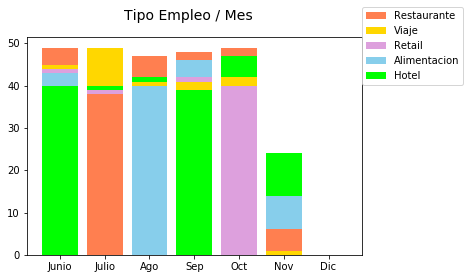

In [101]:
fig,ax=pp.subplots()

fig.suptitle('Tipo Empleo / Mes', fontsize=14)

ax.bar('Junio',junioV,label='Restaurante',color='coral')
ax.bar('Junio',junioH,label='Viaje',color='gold')
ax.bar('Junio',junioR,label='Retail',color='plum')
ax.bar('Junio',junioA,label='Alimentacion',color='skyblue')
ax.bar('Junio',junioRE,label='Hotel',color='lime')


ax.bar('Julio',julioH,label='',color='gold')
ax.bar('Julio',julioA,label='',color='skyblue')
ax.bar('Julio',julioRE,label='',color='lime')
ax.bar('Julio',julioR,label='',color='plum')
ax.bar('Julio',julioV,label='',color='coral')

ax.bar('Ago',agostoR,label='',color='plum')
ax.bar('Ago',agostoV,label='',color='coral')
ax.bar('Ago',agostoRE,label='',color='lime')
ax.bar('Ago',agostoH,label='',color='gold')
ax.bar('Ago',agostoA,label='',color='skyblue')

ax.bar('Sep',septiembreV,label='',color='coral')
ax.bar('Sep',septiembreA,label='',color='skyblue')
ax.bar('Sep',septiembreR,label='',color='plum')
ax.bar('Sep',septiembreH,label='',color='gold')
ax.bar('Sep',septiembreRE,label='',color='lime')

ax.bar('Oct',octubreV,label='',color='coral')
ax.bar('Oct',octubreRE,label='',color='lime')
ax.bar('Oct',octubreA,label='',color='skyblue')
ax.bar('Oct',octubreH,label='',color='gold')
ax.bar('Oct',octubreR,label='',color='plum')

ax.bar('Nov',noviembreR,label='',color='plum')
ax.bar('Nov',noviembreRE,label='',color='lime')
ax.bar('Nov',noviembreA,label='',color='skyblue')
ax.bar('Nov',noviembreV,label='',color='coral')
ax.bar('Nov',noviembreH,label='',color='gold')

ax.bar('Dic',diciembreA,label='',color='skyblue')
ax.bar('Dic',diciembreH,label='',color='gold')
ax.bar('Dic',diciembreV,label='',color='coral')
ax.bar('Dic',diciembreR,label='',color='plum')
ax.bar('Dic',diciembreRE,label='',color='lime')

ax.legend(loc = (1,0.78))

## Recuperados

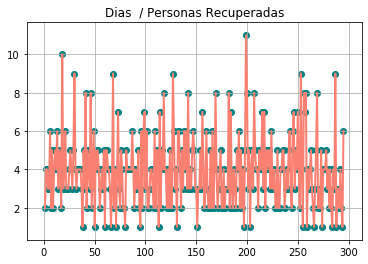

In [90]:
datos=sorted(persona_recuperadas.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='salmon') 
pp.scatter(x,y,color='teal')
pp.title("Dias  / Personas Recuperadas")
pp.grid(True)
pp.show()

## Desempleados

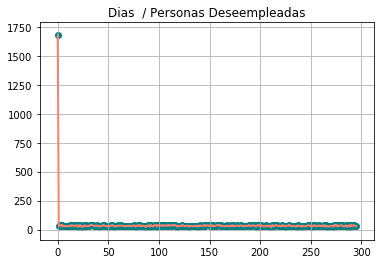

In [93]:
datos=sorted(persona_desempleada.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='salmon') 
pp.scatter(x,y,color='teal')
pp.title("Dias  / Personas Deseempleadas")
pp.grid(True)
pp.show()

## Conclusion parte 2
- La simulacion de eventos discretos nos puede ayudar de muchas maneras, en esta simulacion se puede ver que con diferentes ejecuciones y diferentes valores en los dias de simulacion los valores para los histogramas o los datos que van en este grafico son mas amplios, es decir, si trabajamos con tan solo 200 datos es posible que el histograma no se grafique a mas del mes de Agosto, como por ejemplo ahora con 296 dias, este grafico se amplio hasta el mes de noviembre.